<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Fall-2022-Data-Science-Intern-Challenge" data-toc-modified-id="Fall-2022-Data-Science-Intern-Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><font style="vertical-align: inherit;"><font style="vertical-align: inherit;"> Fall 2022 Data Science Intern </font></font></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Huan-Sun-hs3240@columbia.edu" data-toc-modified-id="Huan-Sun-hs3240@columbia.edu-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span><font style="vertical-align: inherit;"><a class="anchor-link" href="#Huan-Sun-hs3240@columbia.edu"><font style="vertical-align: inherit;"> Huan</font></a><font style="vertical-align: inherit;"> Sun </font></font><a href="mailto:hs3240@columbia.edu" target="_blank"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">hs3240@columbia.edu¶</font></font></a></a></span></li></ul></li></ul></li><li><span><a href="#Question-1:-Data-Manipulation-and-Valuation-Matrix." data-toc-modified-id="Question-1:-Data-Manipulation-and-Valuation-Matrix.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><font style="vertical-align: inherit;"><font style="vertical-align: inherit;"> Question 1: Data Manipulation and Valuation </font></font></a></span><ul class="toc-item"><li><span><a href="#1.1-Think-about-what-could-be-going-wrong-with-calculation-and-about-a-better-way-to-evaluate-this-data." data-toc-modified-id="1.1-Think-about-what-could-be-going-wrong-with-calculation-and-about-a-better-way-to-evaluate-this-data.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><font style="vertical-align: inherit;"><font style="vertical-align: inherit;"> 1.1 Think about what could be going wrong with calculation and about a better way to evaluate this data. </font></font></a></span></li><li><span><a href="#1.2-What-metric-would-you-report-for-this-dataset?" data-toc-modified-id="1.2-What-metric-would-you-report-for-this-dataset?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><font style="vertical-align: inherit;"><font style="vertical-align: inherit;"> 1.2 What metric would you report for this dataset? </font></font></a></span></li><li><span><a href="#1.3-What-is-its-value?" data-toc-modified-id="1.3-What-is-its-value?-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><font style="vertical-align: inherit;"><font style="vertical-align: inherit;"> 1.3 What is its value? </font></font></a></span></li></ul></li><li><span><a href="#Question-2:-SQL-Challenge" data-toc-modified-id="Question-2:-SQL-Challenge-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><font style="vertical-align: inherit;"><a class="anchor-link" href="#Question-2:-SQL-Challenge"><font style="vertical-align: inherit;">SQL</font></a><font style="vertical-align: inherit;"> Challenge¶</font></font></a></span><ul class="toc-item"><li><span><a href="#2.1-How-many-orders-were-shipped-by-Speedy-Express-in-total?" data-toc-modified-id="2.1-How-many-orders-were-shipped-by-Speedy-Express-in-total?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><font style="vertical-align: inherit;"><font style="vertical-align: inherit;"> 2.1 How many orders were shipped by Speedy Express in total? </font></font></a></span></li><li><span><a href="#2.2-What-is-the-last-name-of-the-employee-with-the-most-orders?" data-toc-modified-id="2.2-What-is-the-last-name-of-the-employee-with-the-most-orders?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span></a></span></li><li><span><a href="#2.3-What-product-was-ordered-the-most-by-customers-in-Germany?" data-toc-modified-id="2.3-What-product-was-ordered-the-most-by-customers-in-Germany?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span></a></span></li></ul></li></ul></div>

## Fall 2022 Data Science Intern Challenge
#### Huan Sun hs3240@columbia.edu


In [1]:
# set up enviornment
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('darkgrid')
%matplotlib inline 

# Supress Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Question 1: Data Manipulation and Valuation Matrix. 

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells _only one_ model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

### 1.1 Think about what could be going wrong with calculation and about a better way to evaluate this data. 

In [2]:
# read in datasets 
shopify_order=pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

print(shopify_order.shape)
shopify_order.info()

(5000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [3]:
# check for the time range of the dataset
time_range=pd.DataFrame(pd.to_datetime(shopify_order.created_at.sort_values(ascending=False)))
time_diff=time_range.iloc[0]-time_range.iloc[-1]
time_diff

created_at   29 days 09:46:51
dtype: timedelta64[ns]

_**Analysis**_<br>
From the check of date range above, we can see that the time interval of the dataset is 30 days, which aligns with description from the question that we'd like to check over the 30 days time period, so we can exclude this from being the problem.

In [4]:
# check for the summary numeric values in the dataset
round(shopify_order[['order_amount','total_items']].describe(),2)

,order_amount,total_items
count,5000.00,5000.00
mean,3145.13,8.79
std,41282.54,116.32
min,90.00,1.00
25%,163.00,1.00
50%,284.00,2.00
75%,390.00,3.00
max,704000.00,2000.00


_**Analysis**_<br>
From the statistic summary above, we can see that the number `3145.13` was derived from the mean of the _order_amount_. Which could go wrong as we hadn't checked for the duplicate, outliers yet. 

In [5]:
# check for the duplicates: with the assumption that order_id should be unique
shopify_order[shopify_order.duplicated(subset=['order_id'],keep=False)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at


In [12]:
# check for the outliers: 
outlier_check1=shopify_order.groupby(shopify_order['shop_id'])['order_amount'].mean().reset_index().sort_values(by='order_amount',ascending=False)
outlier_check1

,shop_id,order_amount
41,42,235101.490196
77,78,49213.043478
49,50,403.545455
89,90,403.224490
37,38,390.857143
...,...,...
52,53,214.117647
99,100,213.675000
31,32,189.976190
1,2,174.327273


In [7]:
# check for the mean excluding the outlier with shop_id 42 and 78
outlier_check2=shopify_order.loc[~shopify_order['shop_id'].isin([42,78])].groupby(shopify_order['shop_id'])['order_amount'].mean().reset_index().sort_values(by='order_amount',ascending=False)
outlier_check2.describe()

,shop_id,order_amount
count,98.000000,98.000000
mean,50.306122,299.682399
std,29.162329,50.896733
min,1.000000,162.857143
25%,25.250000,262.661218
50%,50.500000,308.827696
75%,74.750000,334.631226
max,100.000000,403.545455


<AxesSubplot:xlabel='order_amount'>

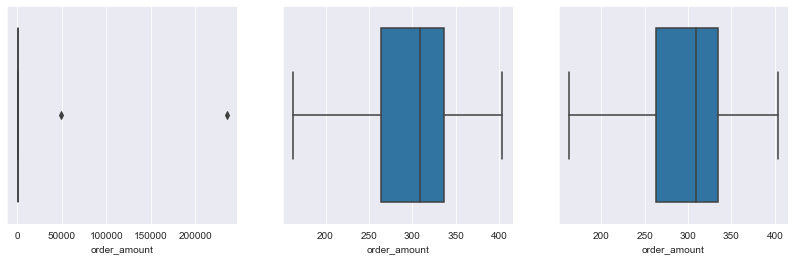

In [8]:
# visualize the outlier
fig,ax=plt.subplots(1,3,figsize=(14,4))
# the boxplot including all the information
sns.boxplot(x=outlier_check1['order_amount'],ax=ax[0])
# use seaborn showfliers method to exclude the outlier
sns.boxplot(x=outlier_check1['order_amount'],showfliers = False,flierprops = dict(markerfacecolor = '0.50', markersize = 2),ax=ax[1])
# suspect the shop_id=42 and shop_id=78 as outlier, the plot is the same as before
sns.boxplot(x=outlier_check2['order_amount'],ax=ax[2])

In [9]:
# have a closer look at the information about the outlier of shop_id=42
shopify_order.loc[(shopify_order['shop_id']==42) & (shopify_order['user_id']==607)].sort_values(by='created_at',ascending=True)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00


In [10]:
# have a closer look at the information about the outlier of shop_id=78
shopify_order.loc[shopify_order['shop_id']==78][:10]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


_**Analysis**_<br>
Sincen there's no duplicates in the file, the result from the post-aggregated calculation and boxplot can tell it's mostly because the outliers. The shop with id 42 and 78 has an average order amount of $235,101.49$ and $49,213.04$,while the averag order amount excluding these two shops is $299.68$, the value of outlier has significantly affecting the AOV by skewing the mean upwards.<br><br>

Having a closer look at the shop_id of 42 , we can see that user_id=607 had made 17 purchases using _**credit card**_ with the exact same total items bought at different days but same timstemp of _**4am**_, which is not a usual time for making transaction, therefore I assume it's the problem with the safety usage of credit card, either 1) the credit card had been stolen or 2) the the credit card company had mistankenly charged multiple times.<br><br>

Another look at the shop_id of 78, it's a different case as the per item price for the shoes is $25,725.00$, which is kind of insane even if it's from a luxury brand. Therefore I assume 1) there's a typo in the digit that the per item price is 257.25 instead of 25725, or 2) this is a foreign brand that they're trading in a foreign currency and didn't take the exchange rate into consideration.<br><br>


Therefore the better way to understand the data is to use it on an aggregated level, that we can see the performance of each store, detecting the outlier and find the potential inbeded problem with eash store.

### 1.2 What metric would you report for this dataset?

As from the analysis above, we can see that it's most likely be the problem of the outlier. Therefore the intuitive method is to exclude these two outliers and get the aggregated number of AOV. Which had already shown before with the value being 299.68. <br><br>
Another strategy though is to use the **Interquartile Range**, which is often denoted as IQR, to measure the spread the middle 50% of dataset, and in this case we use 1.5 times of IQR to remove the outliers.

In [22]:
# get the subset of data that may have outliers
order_amount=pd.DataFrame(outlier_check1['order_amount'])

# use Interquartile Range(IQR), to measure the dispersion of data
Q1 = order_amount.quantile(0.25)
Q3 = order_amount.quantile(0.75)
IQR = Q3-Q1

# use the 1.5 times of IQR as the threshold defining the outliers, remove the outliers
shopify_order_sub = order_amount[~((order_amount < (Q1 - 1.5 * IQR)) |(order_amount > (Q3 + 1.5 * IQR))).any(axis=1)]
shopify_order_sub['order_amount'].mean()

299.6823991261549

### 1.3 What is its value?

Both manual data analysis of removing the outlier and the implementation of IQR suggest that the AOV being $299.68$, which is much more reliable and resonable compared to $3145.43$.

## Question 2: SQL Challenge
For this question you’ll need to use SQL. Follow the link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

### 2.1 How many orders were shipped by Speedy Express in total?

SELECT ShipperName, COUNT(DISTINCT OrderId) as 'Total Count' <br>
FROM Orders LEFT JOIN Shippers <br>
     ON Orders.ShipperId=Shippers.ShipperID <br>
WHERE ShipperName="Speedy Express"  <br>

_**Answer**_<br>
54

_**Analysis**_<br>
The `Orders` table contains all the order information that we need, yet given the shipper's name, we still need to join it with `Shippers` table using its primary key to make the filter functioning. I also use the DISTINCT method, in case that the OrderId was accidentally coded for more than one time. Once we got the desired table, we can use the COUNT method to get the total order count of the specific shipper.

### 2.2 What is the last name of the employee with the most orders?

SELECT LastName, COUNT(DISTINCT OrderID) as 'Max Order'<br>
FROM Orders LEFT JOIN Employees<br>
    ON Orders.EmployeeId=Employees.EmployeeId <br>
GROUP BY 1 <br>
ORDER BY 2 DESC <br>
LIMIT 1

_**Answer**_<br>
Peacock with 40 orders

_**Analysis**_<br>
Similar as above, the `Orders` table already has the information of orders and the corresponding employees, we still need to join it with `Employees` table so that we can filter on the employee's last name. After groupping by the last name of employees, we order theirs order counts in the descending manner, and therefore find the one with the most order.

### 2.3 What product was ordered the most by customers in Germany?


SELECT Products.ProductName, Customers.Country, SUM(OrderDetails.Quantity) as 'Total Orders'  <br>
FROM Orders <br>
	LEFT JOIN Customers ON Customers.CustomerID = Orders.CustomerID <br>
	LEFT JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID <br>
    LEFT JOIN Products ON OrderDetails.ProductID = Products.ProductID <br>
WHERE Country = 'Germany' <br>
GROUP BY 1  <br>
ORDER BY 3 Desc <br>
LIMIT 1

_**Answer**_<br>
Boston Crab Meat which has a order quantity of 160 was ordered the most in Germany.

_**Analysis**_<br>
Now except from the order information from `Orders` table, we would also like to have information about the OrderDetail, Country, Product, which are seperately from `OrderDetails`, `Customers`, `Products` tables. In order to keep all the information from the order table as well, I use LEFT JOIN here to combine four tables using the primary and foreign keys, and include the filter for Germany in the WHERE clause. After summing the quantity and ordering by the sum, we get the final result. 